# Exploratory Data Analysis
## Descriptive Analysis of MBA Students data
***
Trainer : - Rajesh Jakhotia

### Data Import

In [1]:
# Import the required packages
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline

In [2]:
mba_df = pd.read_csv("MBA_Students_Data.csv")

In [3]:
mba_df.shape

(200, 15)

In [4]:
mba_df.head()

sr_no  mba_specialization  mba_grades gender  age pg_degree grad_degree  \
0      1  Business Analytics         8.2      M   26        No      B.Tech   
1      2           Marketing         8.5      F   21        No       B.M.S   
2      3           Marketing         8.9      M   21        No        B.Sc   
3      4           Marketing         8.2      F   23        No       B.Com   
4      5           Marketing         7.2      F   21        No       B.M.S   

   grad_pass_year  grad_pct  ten_plus_2_pass_year  ten_plus_2_pct  \
0            2011     61.65                  2008           85.67   
1            2016     76.75                  2013           87.54   
2            2015     77.25                  2012           75.07   
3            2014     84.21                  2011           82.77   
4            2015     71.00                  2012           71.45   

  ten_plus_2_stream  tenth_pass_year  tenth_std_pct  work_exp_in_mths  
0           Science             2006          80.00              44.0  
1          Commerce             2011          88.40               NaN  
2           Science             2010          84.20               0.0  
3          Commerce             2009          85.09               NaN  
4          Commerce             2010          78.36               6.0

## Analysis of a Single Variable

## Analysis of a Single Categorical Variable
### Frequency Distribution
***
### Analysis of MBA Specialization Field

In [5]:
freq_table = mba_df["mba_specialization"].value_counts().to_frame()
freq_table.reset_index(inplace=True) # reset index
freq_table.columns = [   "Specialization"   , 'Cnt_Students'] # rename columns
freq_table["Pct_Students"] = freq_table['Cnt_Students'] / sum(freq_table['Cnt_Students'])
freq_table

Specialization  Cnt_Students  Pct_Students
0             Finance            80         0.400
1           Marketing            70         0.350
2  Business Analytics            25         0.125
3                  HR            25         0.125

### Bar Plot

<BarContainer object of 4 artists>

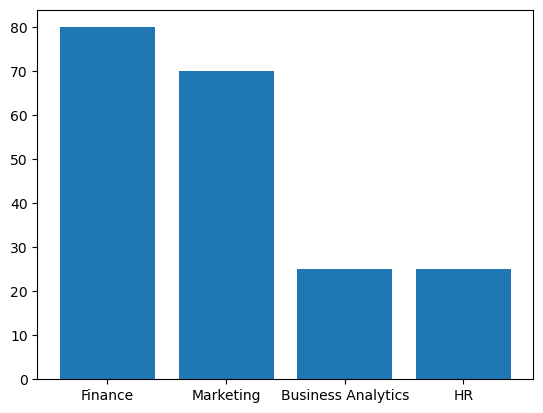

In [6]:
# Simple one line syntax to make bar plot
plt.bar(freq_table['Specialization'], freq_table['Cnt_Students']) 

Text(0, 0.5, '# Students')

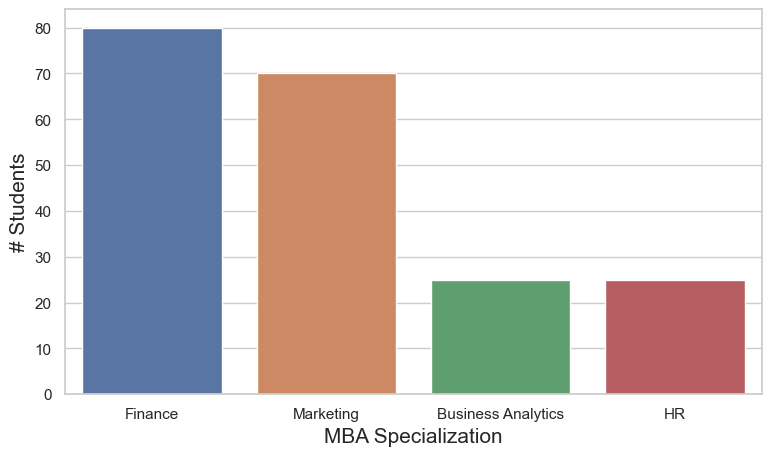

In [7]:
sns.set(style="whitegrid")
plt.figure(figsize=(9,5))
ax = sns.barplot( x = freq_table['Specialization'], 
            y = freq_table['Cnt_Students'])
ax.set_xlabel("MBA Specialization",fontsize=15)
ax.set_ylabel("# Students",fontsize=15)


### Pie Plot

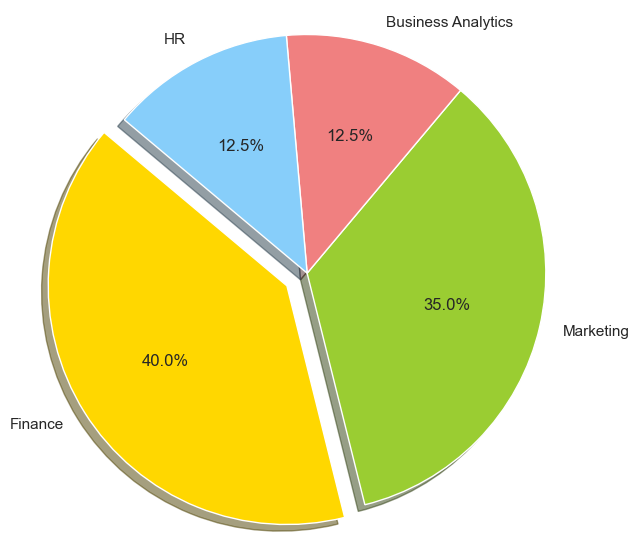

In [8]:
plt.figure(figsize=(7,7))
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(freq_table['Cnt_Students'],
        labels=freq_table['Specialization'],
        explode=explode,  
        colors=colors,
        autopct='%1.1f%%', 
        shadow=True, startangle=140)

plt.axis('equal')
plt.show()

## Y-data Profiling

In [9]:
# conda install -c conda-forge ydata-profiling
# jupyter notebook --version (error displaying widget with version 7.8
# Run the command - pip install -U ipywidgets  to resolve the error displying widget error
from ydata_profiling import ProfileReport
report = ProfileReport(mba_df, title = "MBA Data Analysis")
report.to_notebook_iframe()
report.to_file("mba_students_Report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Analysis of Single Categorical Variable | Graduation Degree

In [10]:
freq_grad_deg = mba_df['grad_degree'].value_counts()
freq_grad_deg.count()

45

In [11]:
freq_grad_deg

grad_degree
B.Com                                           65
B.M.S                                           31
B.E                                             18
B.E - Mechanical                                 9
B.A.F                                            9
B.Com - Honours                                  6
B.Tech                                           4
B.B.A                                            4
B.E - Civil                                      3
B.E - Computers                                  3
B.E - EXTC                                       3
B.Sc                                             3
B.E - Computer Engineering                       2
B.E - Electronics and Telecommunications         2
B.E - Production Engineering                     2
Bachelor of Banking and Insurance                2
B.Tech - Computer Science                        2
B.Tech - Mechanical                              2
B.Sc - Information Technology                    2
B.E - Electrical   

In [12]:
def fn_grad_deg_recat(x):
    x = x.upper()
    if ("B.COM" in x
        or "B.A.F" in x
       ):
        return "B.Com / B.A.F"
    elif ("B.E" in x 
          or "B.TECH" in x
          or x == "BACHELOR IN ENGINEERING"
          or x == "BACHELOR IN COMPUTER APPLICATION"
         ):
        return "B.E / B.Tech"
    elif "B.M.S" in x:
        return "B.M.S"
    elif "B.SC" in x:
        return "B.Sc"
    elif ("B.BA" in x
           or "B.B.A" in x
         ):
        return "B.B.A"
    else:
        return "Other Specializations"

In [13]:
mba_df['grad_deg_recat'] = mba_df['grad_degree'].map(fn_grad_deg_recat)
freq_grad_deg = mba_df['grad_deg_recat'].value_counts().to_frame()
freq_grad_deg.reset_index(inplace=True) # reset index
freq_grad_deg.columns = [   "Graduation Degree"   , 'Cnt_Students'] # rename columns
freq_grad_deg["Pct_Students"] = freq_grad_deg['Cnt_Students'] / sum(freq_grad_deg['Cnt_Students'])
freq_grad_deg

Graduation Degree  Cnt_Students  Pct_Students
0          B.Com / B.A.F            82         0.410
1           B.E / B.Tech            63         0.315
2                  B.M.S            31         0.155
3                   B.Sc            12         0.060
4                  B.B.A             6         0.030
5  Other Specializations             6         0.030

# Analysis of a Single Continuous Variable
***
## Histograms & Density Plots

In [14]:
grades_mean = round(mba_df["mba_grades"].mean(),1)
grades_median = round(mba_df["mba_grades"].median(),1)
grades_min = round(mba_df["mba_grades"].min(),1)
grades_max = round(mba_df["mba_grades"].max(),1)
grades_std = round(np.std(mba_df["mba_grades"]),1)

In [15]:
print("Mean grade of the students is :" , grades_mean)
print("Median grade of the students is :" , grades_median)
print("Min grade of the students is :" , grades_min)
print("Max grade of the students is :" , grades_max)
print("Std. Dev of the students grade is :" , grades_std)

Mean grade of the students is : 7.4
Median grade of the students is : 7.5
Min grade of the students is : 6.3
Max grade of the students is : 9.2
Std. Dev of the students grade is : 0.6


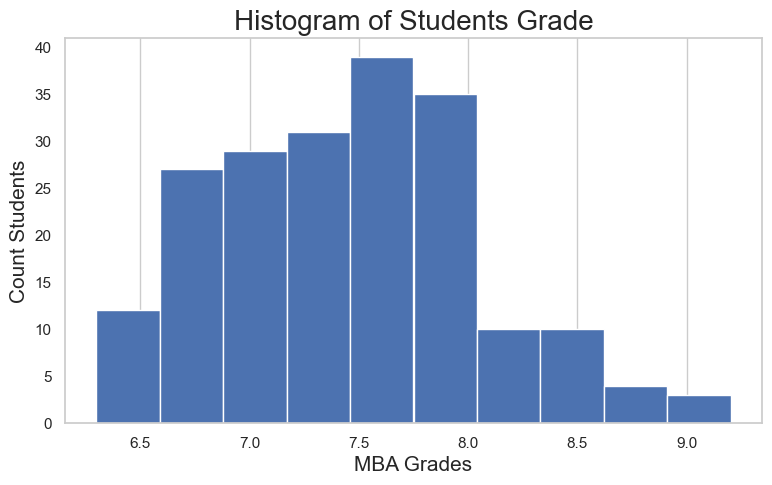

In [16]:
plt.figure(figsize=(9,5))
plt.hist(mba_df['mba_grades'], rwidth = 1)

plt.title("Histogram of Students Grade", fontsize=20)
plt.xlabel('MBA Grades', fontsize=15)
plt.ylabel('Count Students', fontsize=15)
plt.grid(axis='y')

C:\Users\rjakh\anaconda3\envs\PyEnv3117\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


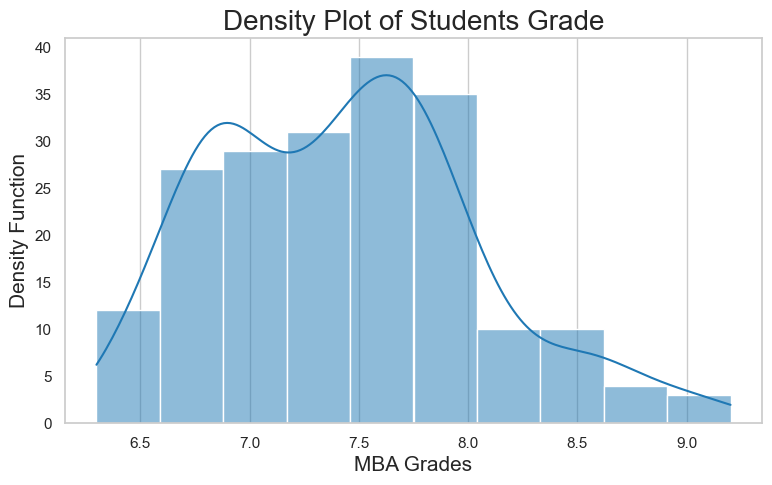

In [17]:
plt.figure(figsize=(9,5))
sns.histplot(mba_df.mba_grades,            
              bins=10, 
             kde=True, color='#1F78B4'
            )
## KDE stands for Kernel Density Estimate

plt.title("Density Plot of Students Grade", fontsize=20)
plt.xlabel('MBA Grades', fontsize=15)
plt.ylabel('Density Function', fontsize=15)
plt.grid(axis='y')

Text(0.5, 0, 'MBA Grades')

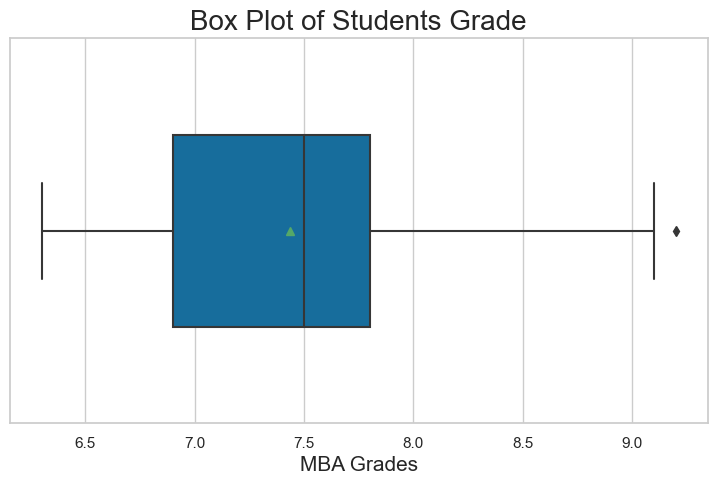

In [18]:
plt.figure(figsize=(9,5))
boxplot = sns.boxplot(x='mba_grades',
                 data=mba_df, showmeans=True,
                 width=0.5, 
                 palette="colorblind")
plt.title("Box Plot of Students Grade", fontsize=20)
plt.xlabel('MBA Grades', fontsize=15)

## Percentile Distribution

In [19]:
# Get the percentile distribution of the students grade
mba_df['mba_grades'].quantile([0,0.01,0.05,0.1,0.15,0.25,0.5,0.75,0.9,0.95,0.99,1]).to_frame().T

0.00  0.01  0.05  0.10  0.15  0.25  0.50  0.75  0.90  0.95   0.99  \
mba_grades   6.3   6.5   6.5  6.79   6.8   6.9   7.5   7.8   8.2   8.6  9.001   

            1.00  
mba_grades   9.2

## Analysis of Two Continuous Variables
## Scatter Plot

Text(0, 0.5, 'MBA Grades')

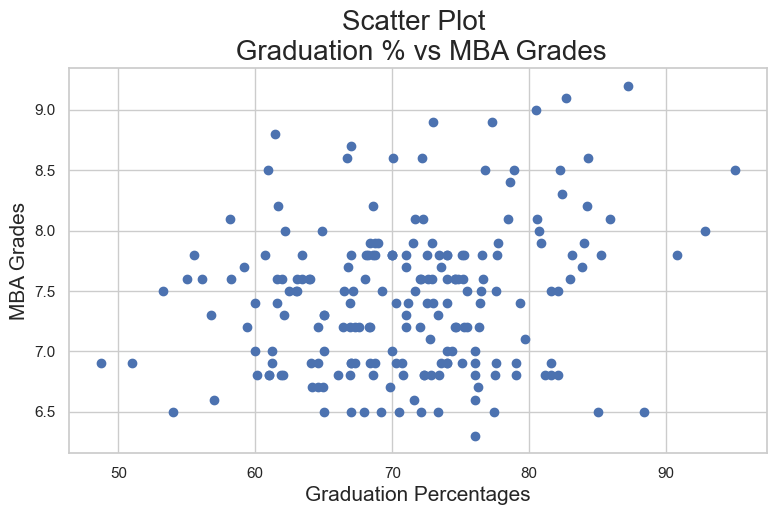

In [20]:
plt.figure(figsize=(9,5))
plt.scatter(x = mba_df["grad_pct"],
            y = mba_df['mba_grades'])

plt.title("Scatter Plot \n Graduation % vs MBA Grades", fontsize=20)
plt.xlabel('Graduation Percentages', fontsize=15)
plt.ylabel('MBA Grades', fontsize=15)

In [21]:
from scipy.stats import pearsonr
corr_1, pValue_1 = pearsonr(mba_df["grad_pct"], mba_df['mba_grades'])
print('between Graduation Percentages and MBA Grades is %.3f' % corr_1)


between Graduation Percentages and MBA Grades is 0.211


### Scatter plot between X and XII standard grades

Text(0, 0.5, '12th Standard Percentages')

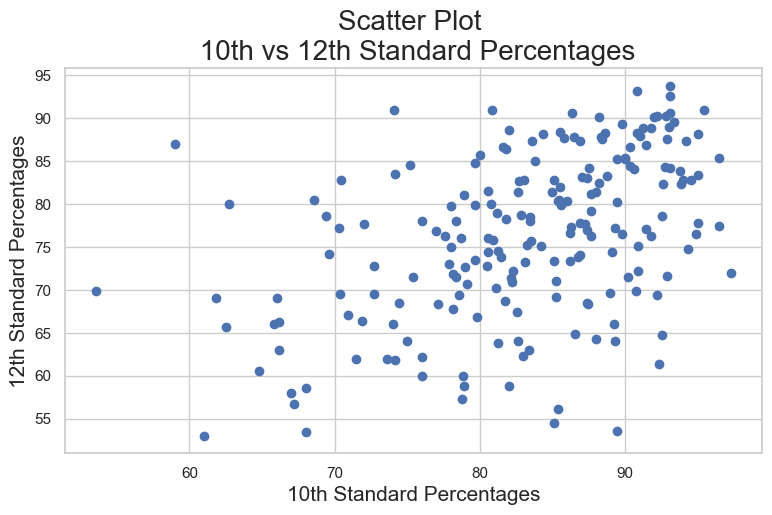

In [22]:
plt.figure(figsize=(9,5))
plt.scatter(x = mba_df["tenth_std_pct"],
            y = mba_df['ten_plus_2_pct'])

plt.title("Scatter Plot \n 10th vs 12th Standard Percentages", fontsize=20)
plt.xlabel('10th Standard Percentages', fontsize=15)
plt.ylabel('12th Standard Percentages', fontsize=15)

In [23]:
from scipy.stats import pearsonr
corr_1, pValue_1 = pearsonr(mba_df["grad_pct"], mba_df['mba_grades'])
corr_2, pValue_2 = pearsonr(mba_df["tenth_std_pct"], mba_df['ten_plus_2_pct'])

print('Pearsons Correlation:')
print('between Graduation Percentages and MBA Grades is %.3f' % corr_1)
print('between 10th and 12th Standard Percentages is %.3f' % corr_2)

Pearsons Correlation:
between Graduation Percentages and MBA Grades is 0.211
between 10th and 12th Standard Percentages is 0.456


## Analysis of Two Categorical Variables
***
### Crosstab and Stacked Bar Plot

In [24]:
mba_df['mba_specialization'].value_counts()

mba_specialization
Finance               80
Marketing             70
Business Analytics    25
HR                    25
Name: count, dtype: int64

In [25]:
mba_df['ten_plus_2_stream'].value_counts()

ten_plus_2_stream
Commerce                             125
Science                               70
Computer Science                       1
Commerce - Information Technology      1
Science - Maths & Biology              1
Science - PCM                          1
Diploma in Mechanical Engineering      1
Name: count, dtype: int64

In [26]:
mba_df['ten_plus_2_stream_recat'] = mba_df['ten_plus_2_stream'].apply(
    lambda x : "Commerce" if ("Commerce" in x ) else "Science")

In [27]:
mba_df['ten_plus_2_stream_recat'].value_counts()

ten_plus_2_stream_recat
Commerce    126
Science      74
Name: count, dtype: int64

### Crosstab Analysis - Stream vs MBA Specialization

In [28]:
pd.crosstab(mba_df['ten_plus_2_stream_recat'],
            mba_df['mba_specialization'],
            dropna = False,
            margins = True
           )

mba_specialization       Business Analytics  Finance  HR  Marketing  All
ten_plus_2_stream_recat                                                 
Commerce                                 13       57  21         35  126
Science                                  12       23   4         35   74
All                                      25       80  25         70  200

### Row Proportions

In [29]:
pd.crosstab(mba_df['ten_plus_2_stream_recat'],
            mba_df['mba_specialization'],
            dropna = False,
            normalize = 'index'
           ).round(3)*100

mba_specialization       Business Analytics  Finance    HR  Marketing
ten_plus_2_stream_recat                                              
Commerce                               10.3     45.2  16.7       27.8
Science                                16.2     31.1   5.4       47.3

### Column Proportions

In [30]:
pd.crosstab(mba_df['ten_plus_2_stream_recat'],
            mba_df['mba_specialization'],
            dropna = False,
            normalize = 'columns'
           ).round(3)*100


mba_specialization       Business Analytics  Finance    HR  Marketing
ten_plus_2_stream_recat                                              
Commerce                               52.0     71.2  84.0       50.0
Science                                48.0     28.8  16.0       50.0

## Analysis of a Categorical and a Continuous Variable

In [31]:
# Get count of missing values
mba_df['work_exp_in_mths'].isnull().sum()

48

In [32]:
# Replace missing work experience by 0
mba_df['work_exp_in_mths'].fillna(0, inplace=True)

In [33]:
mba_df['ten_plus_2_stream'].value_counts()

ten_plus_2_stream
Commerce                             125
Science                               70
Computer Science                       1
Commerce - Information Technology      1
Science - Maths & Biology              1
Science - PCM                          1
Diploma in Mechanical Engineering      1
Name: count, dtype: int64

In [34]:
mba_df['ten_plus_2_stream_recat'] = mba_df['ten_plus_2_stream'].apply(
    lambda x : "Commerce" if ("Commerce" in x ) else "Science")

In [35]:
mba_df['ten_plus_2_stream_recat'].value_counts()

ten_plus_2_stream_recat
Commerce    126
Science      74
Name: count, dtype: int64

In [36]:
aggr = mba_df.groupby(['ten_plus_2_stream_recat']).agg(
    {
        'work_exp_in_mths' : ['count','mean'] #, 'min','max','sum'
    }
)

aggr

work_exp_in_mths           
                                   count       mean
ten_plus_2_stream_recat                            
Commerce                             126   9.920635
Science                               74  16.716216

In [37]:
aggr.columns = aggr.columns.map('_'.join)
aggr.reset_index(inplace=True)
aggr.rename(columns={
    "ten_plus_2_stream_recat": "stream", 
    "work_exp_in_mths_count": "count",
    "work_exp_in_mths_mean" : "avg_work_exp_in_mths"}, 
    inplace = True)

aggr["avg_work_exp_in_mths"] = aggr["avg_work_exp_in_mths"].round(1)

aggr

stream  count  avg_work_exp_in_mths
0  Commerce    126                   9.9
1   Science     74                  16.7

### Gender vs Work Experience

In [38]:
aggr_by_gender = mba_df.groupby(['gender']).agg(
    {
        'work_exp_in_mths' : [('count','count'), ('avg_work_exp','mean')]
    }
)

aggr_by_gender

work_exp_in_mths             
                  count avg_work_exp
gender                              
F                    87    12.091954
M                   113    12.699115

### Box Plot - Graduation Stream vs Work Experience 

Text(0, 0.5, 'Work Experience in Months')

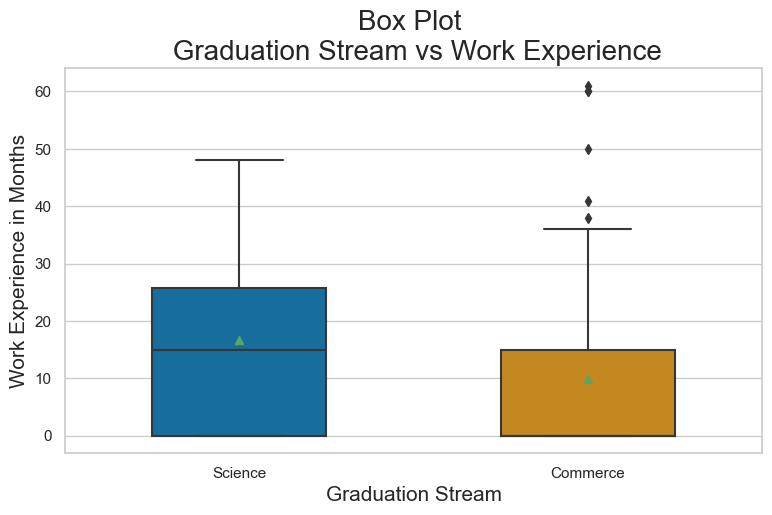

In [39]:
plt.figure(figsize=(9,5))
boxplot = sns.boxplot(
    x = 'ten_plus_2_stream_recat', # Graduation Stream
    y='work_exp_in_mths',
    data=mba_df, showmeans=True,
    width=0.5, 
    palette="colorblind")
plt.title("Box Plot \n Graduation Stream vs Work Experience", fontsize=20)
plt.xlabel('Graduation Stream', fontsize=15)
plt.ylabel('Work Experience in Months', fontsize=15)

### Distribution Plot - Stream vs Work Experience

In [40]:
streams = list(mba_df["ten_plus_2_stream_recat"].unique())
streams

['Science', 'Commerce']

C:\Users\rjakh\anaconda3\envs\PyEnv3117\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


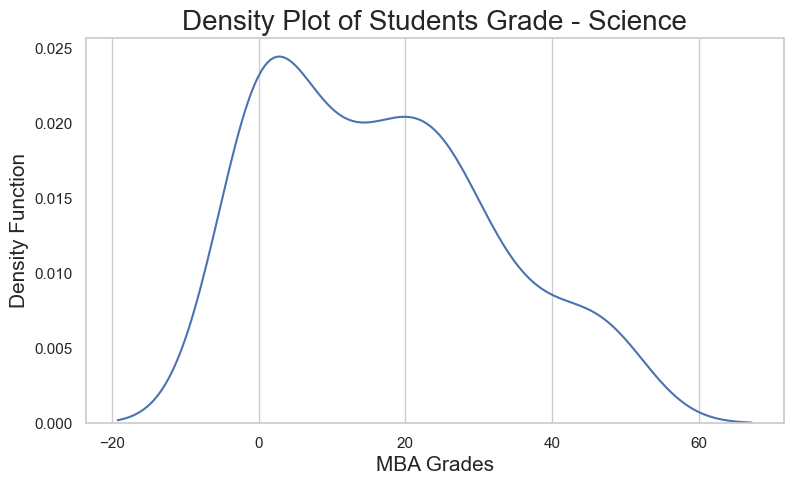

C:\Users\rjakh\anaconda3\envs\PyEnv3117\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


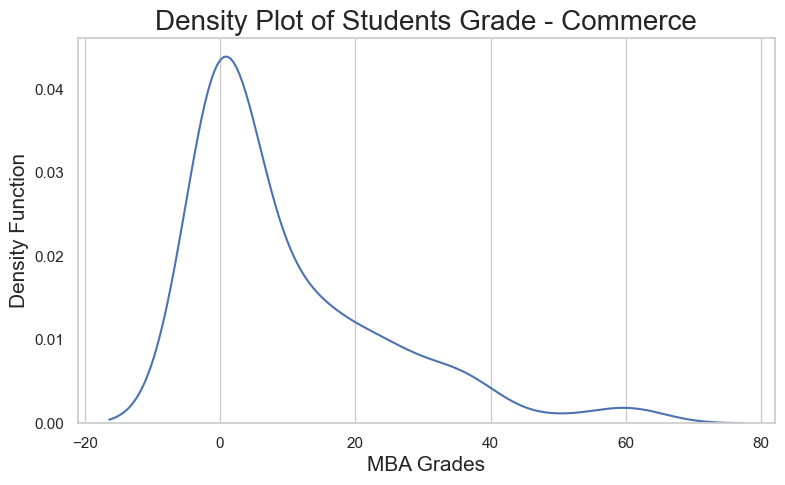

In [41]:
for stream in streams:
    # Subset to the airline
    plt.figure(figsize=(9,5))
    subset = mba_df[mba_df['ten_plus_2_stream_recat'] == stream]
    sns.kdeplot(subset.work_exp_in_mths)
    plt.title(stream)
    plt.title(f"Density Plot of Students Grade - {stream}", fontsize=20)
    plt.xlabel('MBA Grades', fontsize=15)
    plt.ylabel('Density Function', fontsize=15)
    plt.grid(axis='y')
    plt.show()  

# Thank you 
